# Tracking Data Science Trends: Insights from DSSE Tag Popularity (2014–2023)

## Table of Contents
---
1. [Introduction](#Introduction)
2. [Data Source](#Data-Source)
3. [Loading the Data](#Loading-the-Data)
4. [Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)
5. [Top 20 Most Used Tags in DSSE Posts for 2023](#Top-20-Most-Used-Tags-in-DSSE-Posts-for-2023)
6. [Top 20 Most Viewed Tags in DSSE Posts for 2023](#Top-20-Most-Viewed-Tags-in-DSSE-Posts-for-2023)
7. [Analysis of Combined Top Tags in DSSE Posts for 2023](#Analysis-of-Combined-Top-Tags-in-DSSE-Posts-for-2023)
8. [Top 20 Tags by Score in DSSE Posts for 2023](#Top-20-Tags-by-Score-in-DSSE-Posts-for-2023)
9. [Historical Analysis of Popular Tags in Data Science](#Historical-Analysis-of-Popular-Tags-in-Data-Science)
10. [Analysis of Usage and View Rates for Top Tags in DSSE Posts (2014–2023)](#Analysis-of-Usage-and-View-Rates-for-Top-Tags-in-DSSE-Posts-2014–2023)
11. [Conclusion](#Conclusion)
---

## Introduction

### Project Overview
This project examines the evolution of interest in key data science topics by analyzing posts from Data Science Stack Exchange (DSSE) between 2014 and 2023. By studying tag usage and post view trends, the analysis identifies topics that have gained or declined in popularity, offering insights into the changing priorities of the data science community.

---

### Methodology
The analysis leverages metadata from DSSE posts, including tags, view counts, and other attributes, sourced from the Stack Exchange Data Explorer database. Eight selected tags—covering foundational concepts, widely used tools, and emerging technologies—form the basis of the study. Usage and view rates were normalized yearly to account for variations in overall platform activity.

---

### Key Findings
- **Steady Prominence**: Tags like *Python* and *Machine Learning* remain consistently popular, underscoring their foundational role in data science.  
- **Emerging Trends**: The rapid rise of *PyTorch* and *Transformer* models in recent years highlights the community's shift toward advanced tools and methodologies.  

These findings reflect how the data science community's focus has evolved, closely aligning with industry advancements and the adoption of cutting-edge technologies.

## Data Source  
---
The analysis focuses on the Posts table in the publicly accessible Stack Exchange Data Explorer (SEDE) database for DSSE. This table provides detailed metadata for each post, including:

- **Post Metadata:**
  - `post_id`: Unique identifier for the post.
  - `date_created`: Timestamp of when the post was created.
  - `tags`: Tags associated with the post, used for categorization.
  - `title`: Title of the post.
  
- **Post Popularity Metrics:**
  - `score`: Community evaluation score of the post.
  - `view_count`: Number of times the post was viewed.
  - `answer_count`: Number of answers provided to the post.
  - `comment_count`: Number of comments on the post.

### Data Extraction
---
To analyze trends over the past decade, only posts categorized as questions (`PostTypeId = 1`) and created between 2014 and 2023 were included. The following Transact-SQL query was used to extract the data:

```sql
SELECT YEAR(CreationDate) AS year, 
       Id AS post_id,
       CreationDate AS date_created,
       Score AS score,
       ViewCount AS view_count,
       Title AS title,
       Tags AS tags,
       AnswerCount AS answer_count,
       CommentCount AS comment_count
  FROM Posts
 WHERE PostTypeId = 1  -- Only include questions
   AND YEAR(CreationDate) BETWEEN 2014 AND 2023
 ORDER BY CreationDate;

## Loading the Data

In [5]:
# Import necessary libraries
import pandas as pd    
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

# Set pandas to display all floating-point numbers with two decimal places for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Configure the default style for seaborn and matplotlib
sns.set(style="darkgrid")
plt.style.use('fivethirtyeight')

# Load the dataset extracted from the SEDE database
dsse_df = pd.read_csv('dsse_posts_2014_2023.csv', parse_dates = ['date_created'])

dsse_df.head()

,year,post_id,date_created,score,view_count,title,tags,answer_count,comment_count
0,2014,5,2014-05-13 23:58:30,9,986,How can I do simple machine learning without h...,<machine-learning>,1,1
1,2014,7,2014-05-14 00:11:06,4,519,What open-source books (or other materials) pr...,<education><open-source>,3,4
2,2014,14,2014-05-14 01:25:59,26,1954,Is Data Science the Same as Data Mining?,<data-mining><definitions>,4,1
3,2014,15,2014-05-14 01:41:23,2,661,What are the advantages and disadvantages of S...,<databases>,0,1
4,2014,16,2014-05-14 01:57:56,17,446,Use liblinear on big data for semantic analysis,<machine-learning><bigdata><libsvm>,2,0


## Data Cleaning and Preparation

In [7]:
dsse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34633 entries, 0 to 34632
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   year           34633 non-null  int64         
 1   post_id        34633 non-null  int64         
 2   date_created   34633 non-null  datetime64[ns]
 3   score          34633 non-null  int64         
 4   view_count     34633 non-null  int64         
 5   title          34633 non-null  object        
 6   tags           34633 non-null  object        
 7   answer_count   34633 non-null  int64         
 8   comment_count  34633 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.4+ MB


In [8]:
# Replace the sequence '><' with ',' to separate tags and remove '<' and '>' characters to simplify the structure.
dsse_df.loc[:, 'tags'] = (
    dsse_df['tags']
    .str.replace(r"><", ",")  # Replace '><' with ',' to make tags comma-separated
    .str.replace(r"[<>]", "", regex=True)  # Remove '<' and '>' characters
)

dsse_df.head()

,year,post_id,date_created,score,view_count,title,tags,answer_count,comment_count
0,2014,5,2014-05-13 23:58:30,9,986,How can I do simple machine learning without h...,machine-learning,1,1
1,2014,7,2014-05-14 00:11:06,4,519,What open-source books (or other materials) pr...,"education,open-source",3,4
2,2014,14,2014-05-14 01:25:59,26,1954,Is Data Science the Same as Data Mining?,"data-mining,definitions",4,1
3,2014,15,2014-05-14 01:41:23,2,661,What are the advantages and disadvantages of S...,databases,0,1
4,2014,16,2014-05-14 01:57:56,17,446,Use liblinear on big data for semantic analysis,"machine-learning,bigdata,libsvm",2,0


#### Data transformation actions were performed to make the dataset suitable for analysis:  
---

**Transformed the `tags` column**: The `tags` values were restructured by replacing `"><"` with `","` and removing `<` and `>`. This transformation made the column more suitable for string operations and analysis.

## Top 20 Most Used Tags in DSSE Posts for 2023

In [11]:
dsse_posts_2023 = dsse_df[dsse_df['year'] == 2023].reset_index(drop=True)

dsse_posts_2023.head()

,year,post_id,date_created,score,view_count,title,tags,answer_count,comment_count
0,2023,117435,2023-01-01 03:32:10,0,56,Which Feature Selection Techniques for NLP is ...,"nlp,feature-selection,feature-engineering,feat...",1,0
1,2023,117436,2023-01-01 11:42:00,0,103,Predict the values of variable features over t...,"deep-learning,time-series,convolutional-neural...",1,0
2,2023,117439,2023-01-01 12:54:09,0,2661,"ValueError: Input 0 of layer ""model_12"" is inc...","neural-network,keras,tensorflow,convolutional-...",0,2
3,2023,117444,2023-01-02 01:14:52,8,12052,What size language model can you train on a GP...,"nlp,gpu,language-model,memory",1,0
4,2023,117447,2023-01-02 05:52:18,1,111,Drawing transparent bounding boxes with Torchv...,"python,pytorch,computer-vision,torchvision",1,0


In [12]:
from collections import Counter

# Split the 'tags' column into lists of individual tags
# Each value in the 'tags' column is a comma-separated string (e.g., "tag1,tag2").
# Using str.split(','), we break these strings into lists (e.g., ["tag1", "tag2"]).
tags_split = dsse_posts_2023['tags'].str.split(',')

# Flatten the lists and count occurrences of each tag
# The nested loop iterates over all rows (tags_list) and then each tag within the list.
# This creates a single "flat" sequence of tags for counting.
tag_counts = Counter(tag for tags_list in tags_split for tag in tags_list)

# Convert the Counter object into a pandas DataFrame
# I convert the Counter to a DataFrame for easier manipulation and visualization.
# The 'index' becomes the tag names, and 'count' represents their occurrences.
tag_counts_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['count'])

# Sort the DataFrame by 'count' in descending order for analysis
# This ensures that the most frequently used tags appear at the top.
tag_counts_df = tag_counts_df.sort_values(by='count', ascending=False)

tag_counts_df.head(20)  # Shows the 20 most common tags

,count
machine-learning,585
python,302
deep-learning,250
nlp,227
neural-network,167
time-series,141
classification,140
transformer,113
tensorflow,111
scikit-learn,106


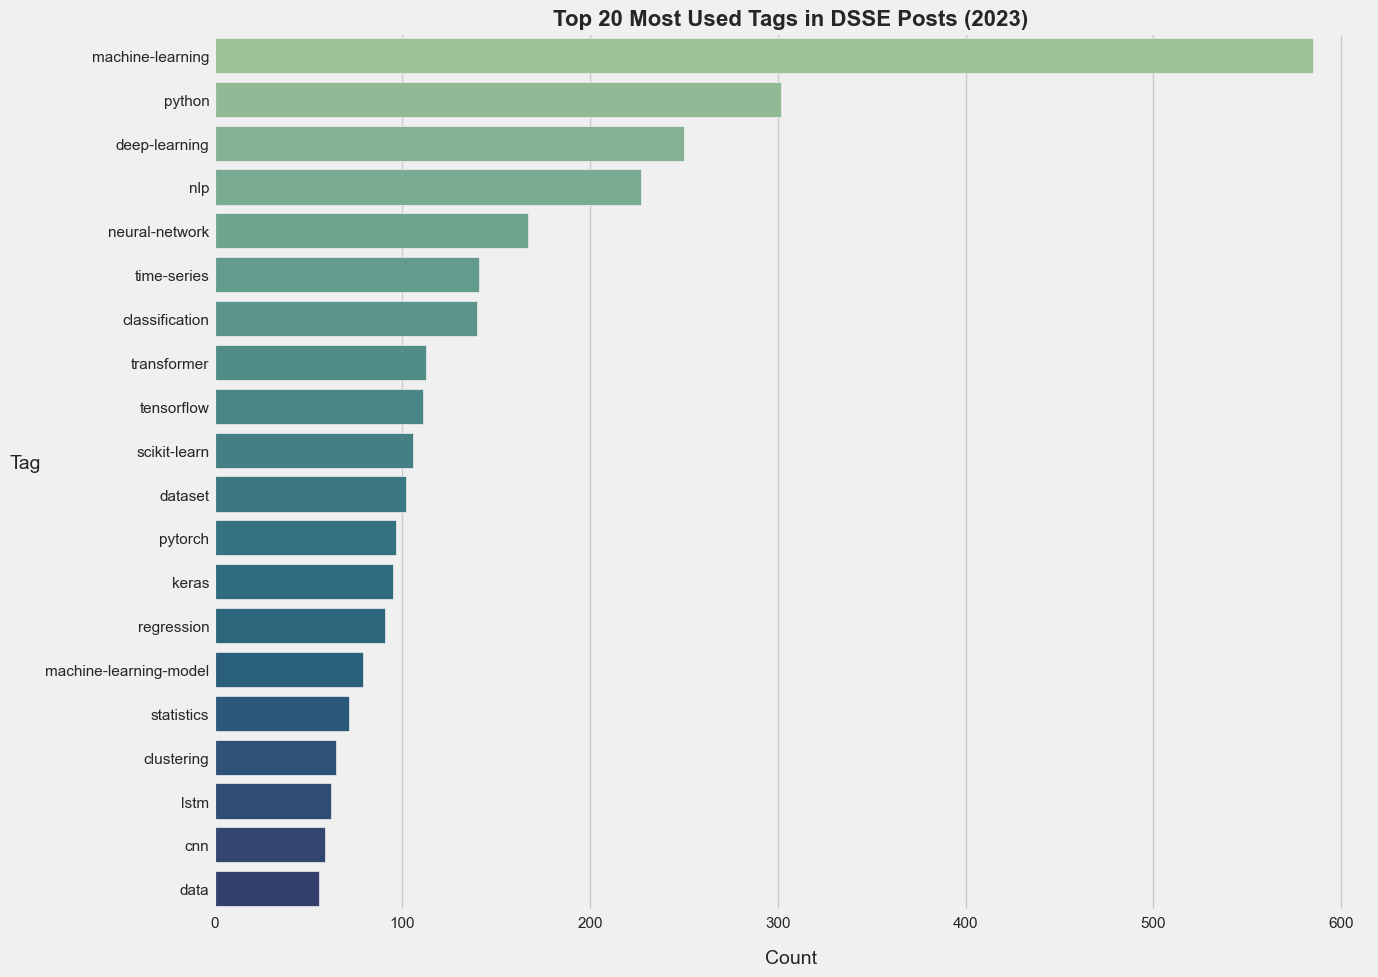

In [13]:
# Prepare the data for visualization
top_20_tags_used = tag_counts_df.head(20).reset_index()
top_20_tags_used.rename(columns={'index': 'tag'}, inplace=True)

# Create a horizontal bar chart
plt.figure(figsize=(14, 10))
sns.barplot(
    x='count',
    y='tag',
    data=top_20_tags_used,
    hue='tag',
    palette='crest'
)

# Add labels and title
plt.title('Top 20 Most Used Tags in DSSE Posts (2023)', weight = 'bold', fontsize = 16)
plt.xlabel('Count', fontsize=14, labelpad=14)
plt.ylabel('Tag', fontsize=14, labelpad=14, rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

## Analysis of the Top 20 Most Used Tags in 2023

### Key Insights:

1. **Machine Learning Dominance**:  
   - `machine-learning` (585) leads, highlighting its central role in 2023.  
   - Related tags like `deep-learning` (250), `classification` (140), and `regression` (91) reflect targeted interests within ML.  

2. **Python Ecosystem**:  
   - `python` (302) remains the top programming language.  
   - Libraries such as `tensorflow` (111), `scikit-learn` (106), `pytorch` (97), and `keras` (95) dominate tool usage in ML workflows.  

3. **Specialized Topics**:  
   - Tags like `nlp` (227), `time-series` (141), and `neural-network` (167) highlight popular application areas.  
   - Emerging techniques, including `transformer` (113), show a growing shift toward advanced models.  

4. **Foundational Concepts**:  
   - Tags like `statistics` (72) and `dataset` (102) underline the importance of core principles in data science.  

---

### Summary:
The focus on advanced ML techniques, specialized applications, and Python-based tools reflects the evolving priorities in data science and machine learning, balancing cutting-edge trends with foundational methods.

## Top 20 Most Viewed Tags in DSSE Posts for 2023

In [16]:
# Split the 'tags' column into separate tags for each row
tags_exploded = dsse_posts_2023['tags'].str.split(',').explode()

# Create a new DataFrame with the exploded tags and view counts
tags_with_views = pd.DataFrame(
    {
        'tag': tags_exploded,
        'view_count': dsse_df.loc[tags_exploded.index, 'view_count']
    }
)

# Group by the tag and sum the view counts
tag_views_count = tags_with_views.groupby('tag')['view_count'].sum().reset_index()

# Sort the results in descending order to see the most viewed tags
tag_views_count_sorted = tag_views_count.sort_values(by='view_count', ascending=False).reset_index(drop=True)

# Display the top 20 results
tag_views_count_sorted.head(20)

,tag,view_count
0,machine-learning,3369956
1,python,1732202
2,deep-learning,1514633
3,classification,1230174
4,nlp,1119596
5,keras,1051332
6,neural-network,1010350
7,tensorflow,694776
8,machine-learning-model,614137
9,logistic-regression,593830


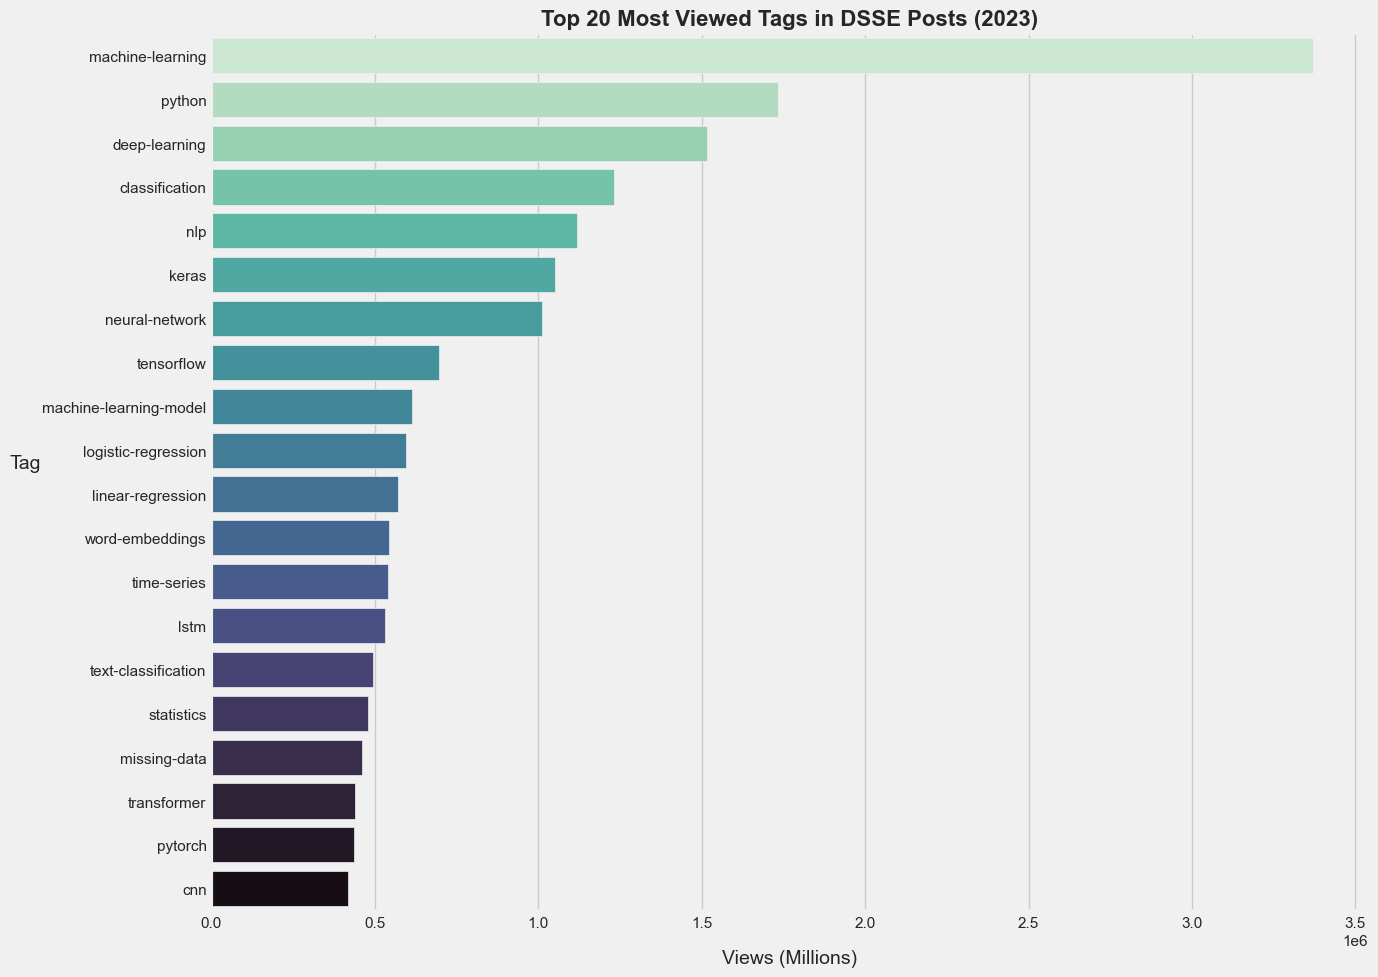

In [17]:
# Prepare the data for visualization
top_20_tags_views = tag_views_count_sorted.head(20).reset_index()

# Create a horizontal bar chart
plt.figure(figsize=(14, 10))
ax = sns.barplot(
    x='view_count',
    y='tag',
    data=top_20_tags_views,
    hue='tag',
    palette='mako_r'
)

# Add labels and title
plt.title('Top 20 Most Viewed Tags in DSSE Posts (2023)', weight = 'bold', fontsize = 16)
plt.xlabel('Views (Millions)', fontsize=14, labelpad=14)
plt.ylabel('Tag', fontsize=14, labelpad=12, rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

## Analysis of the Top 20 Most Viewed Tags in DSSE Posts for 2023

The most viewed tags showcase significant interest in core areas of data science, machine learning, and related technologies.

---

### Key Insights:

1. **Dominant Tags**:  
   - *Machine-learning* (3.37M views) leads by a large margin, reflecting its broad relevance in the DSSE community.  
   - *Python* (1.73M views) highlights its central role as the go-to programming language for data science.

2. **Deep Learning Focus**:  
   - Tags like *Deep-learning* (1.51M views), *Neural-network* (1.01M views), *Keras* (1.05M views), and *TensorFlow* (694K views) emphasize the popularity of neural network frameworks.  
   - *LSTM* (532K views) and *CNN* (416K views) show interest in sequential and convolutional models.

3. **Specialized Topics**:  
   - Tags such as *Classification* (1.23M views), *NLP* (1.12M views), *Time-series* (541K views), and *Transformer* (440K views) highlight interest in specific machine learning applications.  
   - *Word-embeddings* (542K views) and *Text-classification* (495K views) reflect engagement in natural language processing techniques.

4. **Core Concepts**:  
   - Foundational topics like *Logistic-regression* (594K views), *Linear-regression* (570K views), and *Statistics* (480K views) remain essential to the community's learning and practice.

---

### Summary:
The distribution of views reflects a balance of foundational knowledge, advanced techniques, and practical applications in machine learning and data science, emphasizing the community’s diverse interests and expertise.

In [19]:
# Add indicators for most used and most viewed tags
top_20_tags_used['most_used'] = 'Yes'
top_20_tags_views['most_viewed'] = 'Yes'

# Perform an outer merge to combine the lists while retaining all tags
combined_top_tags = pd.merge(
    top_20_tags_used[['tag', 'most_used']],  # Include only relevant columns
    top_20_tags_views[['tag', 'most_viewed']],  # Include only relevant columns
    how='outer', 
    on='tag'
)

# Fill NaN values in the indicator columns with 'No'
combined_top_tags['most_used'] = combined_top_tags['most_used'].fillna('No')
combined_top_tags['most_viewed'] = combined_top_tags['most_viewed'].fillna('No')

# Sort alphabetically by tag for clarity
combined_top_tags = combined_top_tags.sort_values(by='tag').reset_index(drop=True)

# Display the combined DataFrame
combined_top_tags

,tag,most_used,most_viewed
0,classification,Yes,Yes
1,clustering,Yes,No
2,cnn,Yes,Yes
3,data,Yes,No
4,dataset,Yes,No
5,deep-learning,Yes,Yes
6,keras,Yes,Yes
7,linear-regression,No,Yes
8,logistic-regression,No,Yes
9,lstm,Yes,Yes


## Analysis of Combined Top Tags in DSSE Posts for 2023

A combined analysis of the top tags based on usage and views highlights key trends and areas of focus in the DSSE community.

---

### Tags in Both "Most Used" and "Most Viewed" Categories:
These tags demonstrate consistent engagement across both metrics:
- **Core Machine Learning Topics**:  
  *Machine-learning*, *Deep-learning*, *Neural-network*, and *Statistics* highlight their broad applicability and relevance.  
- **Specialized Techniques and Frameworks**:  
  *NLP*, *CNN*, *LSTM*, and *Transformer* show interest in advanced models and applications.  
  *Keras*, *TensorFlow*, *PyTorch*, and *Scikit-learn* reinforce reliance on widely used ML frameworks.  
- **Data Types and Applications**:  
  Tags like *Time-series* and *Text-classification* emphasize focus on specific use cases.

---

### Tags Only in "Most Viewed":
These tags reflect foundational or niche topics often explored for learning or troubleshooting:
- *Linear-regression* and *Logistic-regression* demonstrate strong interest in traditional modeling techniques.  
- *Missing-data* and *Word-embeddings* highlight engagement in preprocessing and NLP topics.

---

### Tags Only in "Most Used":
These tags represent frequently applied topics in daily workflows but may generate less user-driven query traffic:
- Tags like *Clustering*, *Data*, *Dataset*, and *Regression* indicate their practical utility in data science projects.

---

### Key Takeaways:
- The overlap in usage and viewership for advanced techniques and frameworks confirms their central role in data science discussions.  
- Foundational tags remain highly viewed, reflecting ongoing demand for core concepts.  
- Practical tags like *Clustering* and *Dataset* being heavily used but less viewed may indicate their integration into routine workflows rather than frequent query topics.

## Top 20 Tags by Score in DSSE Posts for 2023

In [22]:
# Create a new DataFrame associating each tag with its corresponding score
tags_with_scores = pd.DataFrame({
    'tag': tags_exploded,
    'score': dsse_posts_2023.loc[tags_exploded.index, 'score']
})

# Group by the tag and sum the scores
tag_scores = tags_with_scores.groupby('tag')['score'].sum().reset_index()

# Sort the results by total score in descending order
tag_scores_sorted = tag_scores.sort_values(by='score', ascending=False).reset_index(drop=True)

# Extract the top 20 tags with the highest total score
top_20_tags_by_score = tag_scores_sorted.head(20)

# Display the results
top_20_tags_by_score

,tag,score
0,machine-learning,333
1,nlp,230
2,python,154
3,deep-learning,145
4,transformer,115
5,gpt,101
6,neural-network,84
7,language-model,83
8,classification,74
9,tensorflow,69


## Analysis of Top 20 Tags by Score in DSSE Posts for 2023

---

### Observations:

1. **Core Machine Learning Topics**:  
   - Tags like *machine-learning* (333), *deep-learning* (145), and *neural-network* (84) dominate, reinforcing their central importance in data science discussions.  
   - Foundational concepts such as *classification* (74) and *machine-learning-model* (37) reflect continued engagement with classical machine learning methods.

2. **Prominent NLP Advancements**:  
   - Tags such as *nlp* (230), *transformer* (115), *gpt* (101), and *language-model* (83) show the growing influence of generative AI and advanced NLP applications.  
   - Interest in *word-embeddings* (43) indicates ongoing exploration of feature extraction techniques.

3. **Popular Libraries and Frameworks**:  
   - *TensorFlow* (69), *Keras* (48), *PyTorch* (52), and *scikit-learn* (61) confirm the community’s reliance on robust machine learning libraries.  
   - Their scores highlight their integral role in practical workflows.

4. **Other Relevant Topics**:  
   - Tags like *time-series* (55) and *lstm* (45) show sustained interest in sequence modeling and forecasting.  
   - *Dataset* (48) reflects discussions around data management and preprocessing challenges.

---

### Why Scores Are Not Used Further:
While scores capture user appreciation and perceived usefulness, they are subjective and influenced by factors like voting trends and question visibility. These biases make scores unsuitable for identifying objective trends over time.  

For historical analysis, metrics such as "usage frequency" and "view counts" offer a more reliable representation of community interest and engagement across years.

## Historical Analysis of Popular Tags in Data Science

### Approach
This analysis explores the evolution of popular data science tags from 2014 to 2023, with a focus on identifying trends in community interest, industry developments, and the rise of new tools and techniques.

---

### Selected Tags:
#### Machine-learning:
A foundational tag in data science that has maintained its significance over the years. It represents the core techniques and methodologies that power data science, including supervised and unsupervised learning, and continues to evolve as new models and algorithms are developed.

#### Python:
At the heart of most data science workflows, Python remains a central language for data analysis, machine learning, and AI. Its extensive libraries (like Pandas, NumPy, and scikit-learn) make it a go-to for developers and researchers alike, solidifying its place as a key indicator of the field's trends.

#### Deep-learning:
This tag marks the rapid advancements in neural networks, particularly with the rise of deep learning architectures. From image recognition to language processing, deep learning has revolutionized AI and continues to drive progress in both research and real-world applications.

#### NLP:
As natural language processing has evolved, this tag highlights the growing importance of unstructured text data. With models like BERT and GPT, NLP is shaping how machines understand and generate human language, making it a critical area of focus for AI research and development.

#### TensorFlow:
A major player in the deep learning framework space, TensorFlow has been central to the deployment of machine learning models in production environments. Its flexibility and scalability have made it a favorite for both academia and industry, driving widespread adoption across a range of applications.

#### Keras:
Keras simplifies building deep learning models and is a go-to tool for those new to neural networks. Its user-friendly interface, combined with the power of TensorFlow under the hood, makes it an essential tool for quickly experimenting with and developing neural network-based models.

#### PyTorch:
PyTorch has emerged as a powerful alternative to TensorFlow, particularly favored for research and academic purposes. Its dynamic computation graph and intuitive design make it an excellent choice for those who value flexibility and experimentation in model building. Over the years, PyTorch's popularity has surged, making it one of the most widely adopted frameworks in both academia and industry.

#### Transformer:
The transformer architecture has revolutionized the field of NLP and beyond. With its attention mechanism, transformers have enabled significant advances in tasks like language translation, text generation, and even image processing. The success of models like GPT, BERT, and T5 has led to the widespread adoption of transformers as the go-to approach for many AI tasks, reshaping the landscape of machine learning.

---

### Why These Tags?
These tags represent a mix of enduring pillars and emerging trends in data science. They cover both foundational techniques (such as machine learning and Python) and cutting-edge technologies (like deep learning, PyTorch, and transformers). By analyzing these tags, we gain insights into the tools, methodologies, and areas of research that have driven the field forward, highlighting how data science has evolved in response to both academic innovation and real-world demands.

In [25]:
# Define the tags of interest for the analysis
tags_of_interest = ['machine-learning', 'python', 'deep-learning', 'nlp', 'tensorflow', 'keras', 'pytorch', 'transformer']

# Split the 'tags' column into a list of individual tags for each post
dsse_df['tags'] = dsse_df['tags'].str.split(',')

# Calculate yearly totals for posts and views across all tags
yearly_totals = dsse_df.groupby('year').agg(
    total_posts=('post_id', 'count'),  # Count the total number of posts per year
    total_views=('view_count', 'sum') # Sum the total views per year
).reset_index()

# Initialize a list to store trends for each tag
tag_trends = []

# Loop through each tag of interest to calculate its yearly statistics
for tag in tags_of_interest:
    # Filter the dataframe for posts containing the current tag
    tag_data = dsse_df[dsse_df['tags'].apply(lambda x: tag in x)]
    
    # Aggregate yearly statistics for the current tag
    yearly_tag_stats = tag_data.groupby('year').agg(
        tag_posts=('post_id', 'count'),  # Count the number of posts with the tag per year
        tag_views=('view_count', 'sum') # Sum the total views for posts with the tag per year
    ).reset_index()
    
    # Merge the tag-specific data with the yearly totals to calculate rates
    merged_data = yearly_tag_stats.merge(yearly_totals, on='year')
    
    # Calculate the usage rate (proportion of posts with the tag) and view rate (proportion of views for the tag)
    merged_data['usage_rate'] = merged_data['tag_posts'] / merged_data['total_posts']
    merged_data['view_rate'] = merged_data['tag_views'] / merged_data['total_views']
    
    # Add the tag name as a column for identification
    merged_data['tag'] = tag
    
    # Append the processed data for the tag to the list
    tag_trends.append(merged_data)

# Concatenate all tag-specific dataframes into a single dataframe
normalized_trends = pd.concat(tag_trends, ignore_index=True)

# Display the first few rows of the normalized trends dataframe
normalized_trends.head()

,year,tag_posts,tag_views,total_posts,total_views,usage_rate,view_rate,tag
0,2014,171,1459423,559,3950038,0.31,0.37,machine-learning
1,2015,396,1956169,1161,5818974,0.34,0.34,machine-learning
2,2016,664,3632210,2111,13187084,0.31,0.28,machine-learning
3,2017,995,4624658,2914,13124690,0.34,0.35,machine-learning
4,2018,1853,6573903,5299,19487125,0.35,0.34,machine-learning


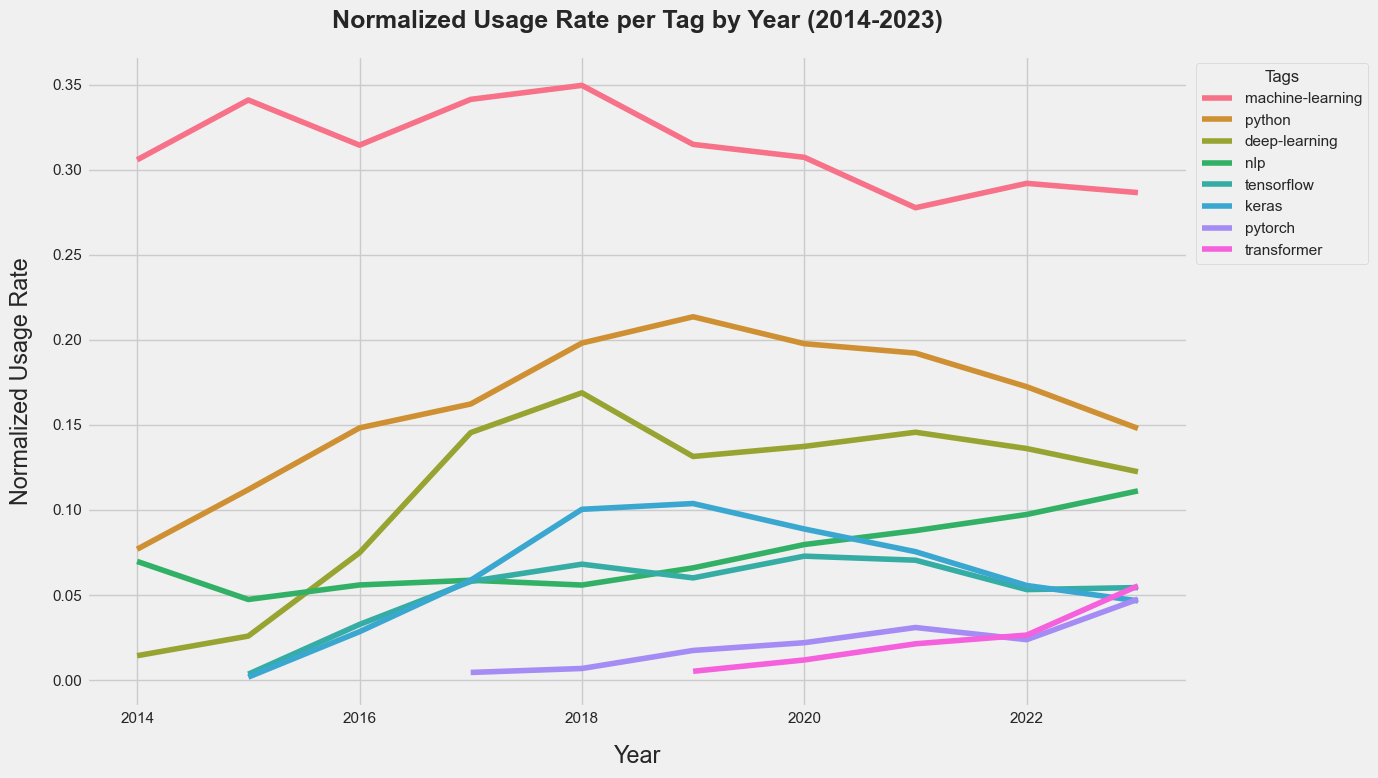

In [26]:
# Set the figure size for the plot
plt.figure(figsize=(14, 8))

# Create a line plot showing the normalized usage rate over time for each tag
sns.lineplot(
    x='year',  # Use the 'year' column for the x-axis
    y='usage_rate',  # Use the 'usage_rate' column for the y-axis
    hue='tag',  # Different lines for each tag
    data=normalized_trends  # Data source: the normalized trends dataframe
)

# Add a title to the plot with bold text, a larger font size, and padding for spacing
plt.title('Normalized Usage Rate per Tag by Year (2014-2023)', weight='bold', fontsize=18, pad=20)

# Label the x-axis with padding for spacing
plt.xlabel('Year', labelpad=14)

# Label the y-axis with padding for spacing
plt.ylabel('Normalized Usage Rate', labelpad=14)

# Add a legend to indicate which line corresponds to which tag
# Position the legend outside the plot on the upper left side
plt.legend(title='Tags', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust the layout to prevent overlapping elements (e.g., title, labels, and legend)
plt.tight_layout()

# Display the plot
plt.show()

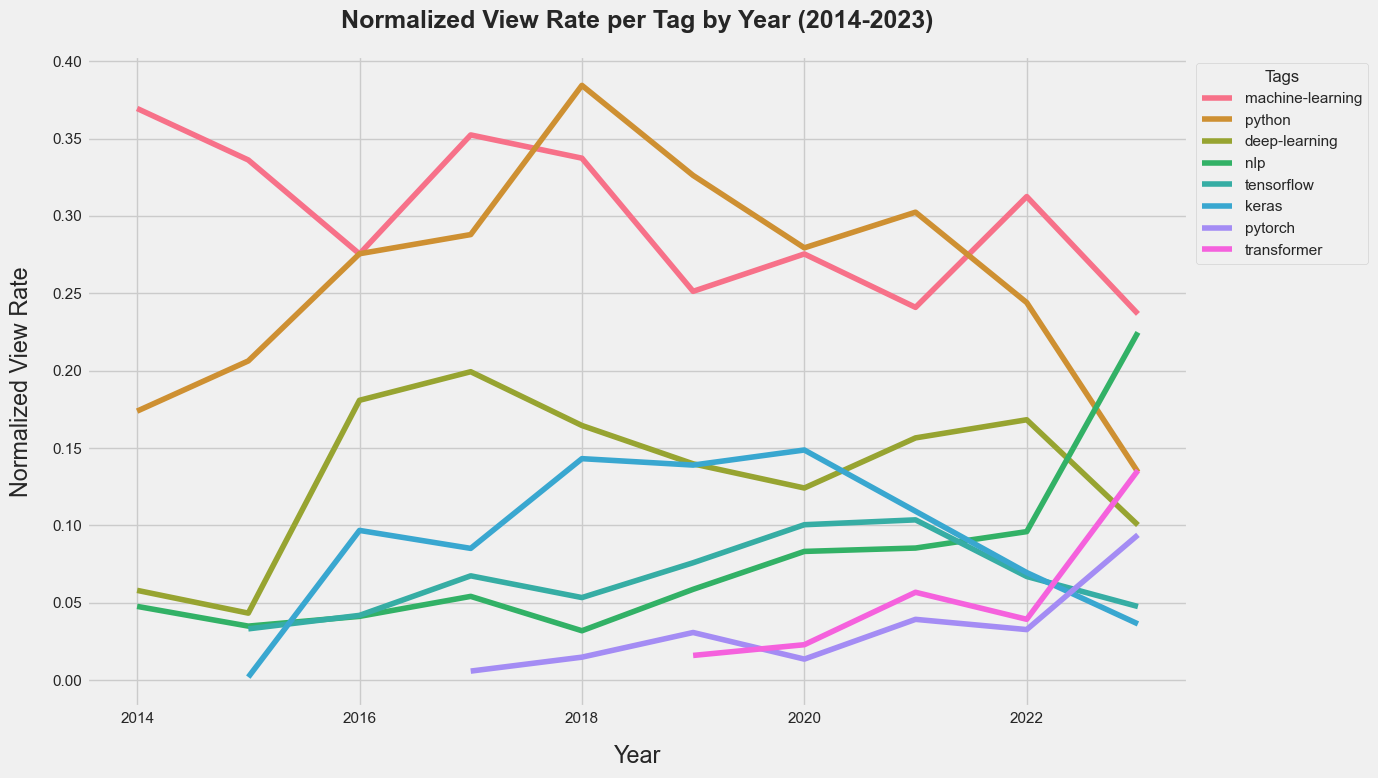

In [27]:
# Set the figure size for the plot
plt.figure(figsize=(14, 8))

# Create a line plot showing the normalized view rate over time for each tag
sns.lineplot(
    x='year',  # Use the 'year' column for the x-axis
    y='view_rate',  # Use the 'view_rate' column for the y-axis
    hue='tag',  # Different lines for each tag
    data=normalized_trends  # Data source: the normalized trends dataframe
)

# Add a title to the plot with bold text, a larger font size, and padding for spacing
plt.title('Normalized View Rate per Tag by Year (2014-2023)', weight='bold', fontsize=18, pad=20)

# Label the x-axis with padding for spacing
plt.xlabel('Year', labelpad=14)

# Label the y-axis with padding for spacing
plt.ylabel('Normalized View Rate', labelpad=14)

# Add a legend to indicate which line corresponds to which tag
# Position the legend outside the plot on the upper left side
plt.legend(title='Tags', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust the layout to prevent overlapping elements (e.g., title, labels, and legend)
plt.tight_layout()

# Display the plot
plt.show()

## Analysis of Usage and View Rates for Top Tags in DSSE Posts (2014–2023)

---

### Approach:
This analysis examines usage and view rates for popular data science tags like *machine-learning*, *python*, *deep-learning*, *nlp*, *tensorflow*, *keras*, *pytorch*, and *transformer* over the years 2014–2023. By analyzing trends, we can understand the evolving interests and tools in the data science community.

---

### Data Overview:
- **Usage Rate**: Proportion of posts with a specific tag relative to total posts.  
- **View Rate**: Proportion of views for posts with the tag relative to total views.  
- Rates are normalized for consistency across years.

---

### Observations:

#### **Machine Learning**:
- **Usage Rate**: Peaked at 0.35 in 2018, stabilizing around 0.30 in recent years.  
- **View Rate**: Peaked at 0.37 in 2014 but declined to 0.24 in 2023, reflecting saturation.

#### **Python**:
- **Usage Rate**: Grew steadily from 0.08 in 2014 to 0.15 in 2023.  
- **View Rate**: Peaked at 0.21 in 2015 but dropped to 0.13 in 2023, suggesting diversification of tools.

#### **Deep Learning**:
- **Usage Rate**: Rose significantly between 2016 and 2018, plateauing around 0.12–0.17 since then.  
- **View Rate**: Peaked at 0.16 in 2018, stabilizing at 0.10 by 2023.

#### **NLP**:
- **Usage Rate**: Grew from 0.05 in 2014 to 0.11 in 2023, showing steady interest.  
- **View Rate**: Jumped to 0.22 in 2023, driven by advances in language models like GPT and Transformers.

#### **TensorFlow**:
- **Usage Rate**: Peaked at 0.07 in 2017–2018 but declined to 0.05 in 2023 as PyTorch gained traction.  
- **View Rate**: Followed a similar trend, dropping from 0.08 in 2019 to 0.05 in 2023.

#### **Keras**:
- **Usage Rate**: Strong from 2017 to 2020, dropping to 0.05 in 2023.  
- **View Rate**: Declined from 0.15 in 2020 to 0.04 in 2023.

#### **PyTorch**:
- **Usage Rate**: Steadily increased from 0.00 in 2017 to 0.05 in 2023, reflecting growing adoption.  
- **View Rate**: Rose from 0.01 in 2017 to 0.09 in 2023, signaling increased interest.

#### **Transformer**:
- **Usage Rate**: Grew from 0.01 in 2019 to 0.06 in 2023, reflecting their importance in modern AI.  
- **View Rate**: Surged to 0.14 in 2023, driven by the widespread adoption of transformer-based models.

---

### Summary:
- **Core Technologies**: Tags like *machine-learning* and *python* remain dominant but show signs of stabilization.  
- **Framework Shifts**: Declines in *tensorflow* and *keras* usage reflect PyTorch’s rising popularity.  
- **Emerging Trends**: Tags like *transformer* and *pytorch* highlight the community’s shift toward advanced deep learning models and NLP innovations.

These trends illustrate a dynamic field where foundational tools persist, but newer technologies like transformers are reshaping the future of data science.

# Conclusion

This project analyzed trends in the popularity of data science topics on Data Science Stack Exchange (DSSE) from 2014 to 2023. By examining the usage and view rates of selected tags, it uncovered shifts in community interest and provided a data-driven perspective on emerging trends.

---

### Key Findings:
- **Emerging Tools**: Rapid growth in the adoption of tools like *PyTorch* and *Transformer* reflects the increasing focus on modern AI and natural language processing techniques.  
- **Foundational Topics**: Tags like *Machine Learning* and *Python* remain consistently relevant, underscoring their foundational role in data science.  
- **Dynamic Evolution**: The rise of deep learning frameworks and NLP demonstrates how the field continues to evolve toward cutting-edge methodologies.  

---

These findings highlight the dynamic nature of data science, offering valuable insights into the DSSE community’s evolving interests. They also provide a foundation for developing educational and professional resources aligned with current trends in the field.
